In [1]:
import  warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Load Data

In [2]:
user = pd.read_csv('/Users/kexinluo/Desktop/DS_take_home/5.Funnel_Analysis/user_table.csv', parse_dates=['date'])
user.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [3]:
home = pd.read_csv('/Users/kexinluo/Desktop/DS_take_home/5.Funnel_Analysis/home_page_table.csv')
home.head()

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [4]:
search = pd.read_csv('/Users/kexinluo/Desktop/DS_take_home/5.Funnel_Analysis/search_page_table.csv')
search.head()

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [5]:
confirm = pd.read_csv('/Users/kexinluo/Desktop/DS_take_home/5.Funnel_Analysis/payment_confirmation_table.csv')
confirm.head()

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


In [6]:
payment = pd.read_csv('/Users/kexinluo/Desktop/DS_take_home/5.Funnel_Analysis/payment_page_table.csv')
payment.head()

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


# Data Processing

In [7]:
data = pd.merge(left=user, right=home, how='left', on='user_id')
data = pd.merge(left=data, right=search, how='left', on='user_id', suffixes=('_home', '_search'))
data = pd.merge(left=data, right=payment, how='left', on='user_id')
data = pd.merge(left=data, right=confirm, how='left', on='user_id', suffixes=('_payment', '_confirmation'))
data.head()

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            90400 non-null  int64         
 1   date               90400 non-null  datetime64[ns]
 2   device             90400 non-null  object        
 3   sex                90400 non-null  object        
 4   page_home          90400 non-null  object        
 5   page_search        45200 non-null  object        
 6   page_payment       6030 non-null   object        
 7   page_confirmation  452 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 6.2+ MB


# Analysis

## Visit Probability for Each Page

In [9]:
conv_ratio = 1 - pd.DataFrame(data.isnull().sum()).rename(columns={0: 'conversion'}) / len(data)
conv_ratio = conv_ratio.reset_index()[4:]
conv_ratio

,index,conversion
4,page_home,1.000000
5,page_search,0.500000
6,page_payment,0.066704
7,page_confirmation,0.005000


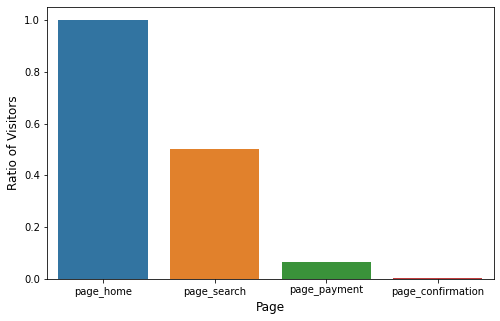

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='index', y='conversion', data=conv_ratio, ax=ax)
ax.set_xlabel('Page', fontsize=12)
ax.set_ylabel('Ratio of Visitors', fontsize=12)
plt.show()

## Conversion Rate for Each Page

In [ ]:
def conversion_rate(df):
    """ function to calculate conversion rates for home, search and payment page"""
    rates = []
    tmp = df[~df['page_home'].isnull()]
    rates.append(1 - tmp['page_search'].isnull().sum() / len(tmp))
    
    tmp = df[~df['page_search'].isnull()]
    rates.append(1 - tmp['page_payment'].isnull().sum() / len(tmp))
    
    tmp = df[~df['page_payment'].isnull()]
    rates.append(1 - tmp['page_confirmation'].isnull().sum() / len(tmp))
    
    return rates